## Step 1: Reading and Understanding the data

In [ ]:
# Importing Numpy and Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
# Load data

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# Structural check of df

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Pre-processing the data

In [ ]:
# Dropping columns which are unnecessary - instant, dteday,casual,registered

In [7]:
df.drop(['instant','dteday','casual','registered'], axis=1,inplace=True)

In [8]:
df.shape

(730, 12)

In [ ]:
# Mapping columns season, mnth, weekday, weathersit to their original values

In [9]:
df['season'] = df['season'].map({1:'s1_spring', 2:'s2_summer', 3:'s3_fall', 4:'s4_winter'})

In [10]:
df['mnth'] =df['mnth'].map({1:'month_1',2:'month_2',3:'month_3',4:'month_4',5:'month_5',6:'month_6',7:'month_7',8:'month_8',9:'month_9',10:'month_10',11:'month_11',12:'month_12'})

In [11]:
df['weekday'] = df['weekday'].map({0:'d0_sun',1:'d1_mon',2:'d2_tue',3:'d3_wed',4:'d4_thur',5:'d5_fri',6:'d6_sat'})

In [12]:
df['weathersit'] = df['weathersit'].map({1:'ws1_clear',2:'ws2_mist',3:'ws3_light-rain',4:'ws4_heavy-rain'})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 3: Visualising the data

In [ ]:
# Import matplotlib and seaborn

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Univariate Analysis

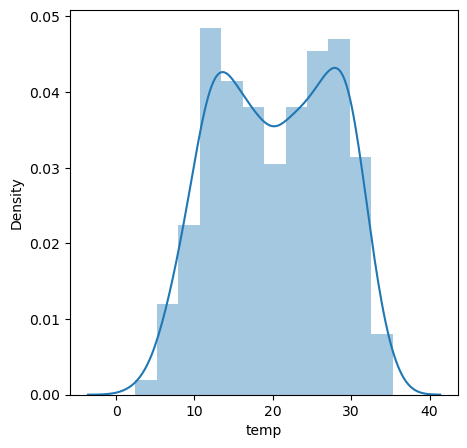

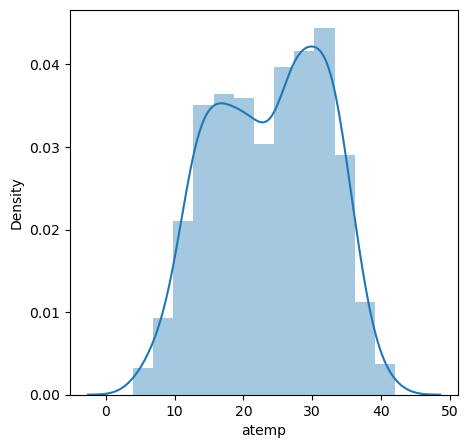

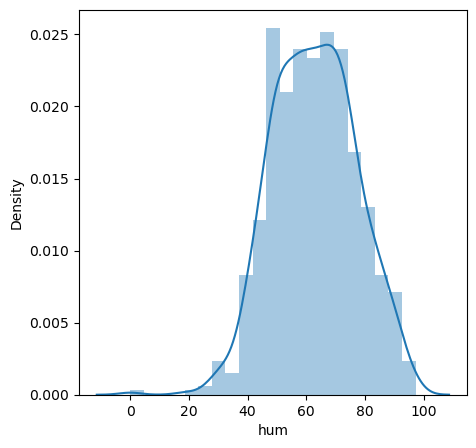

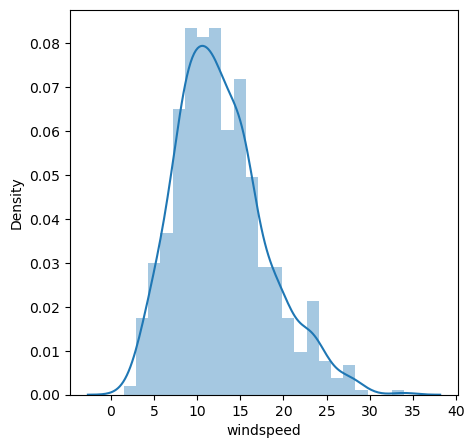

In [15]:
cont_col = ['temp','atemp','hum','windspeed']
for i in cont_col:
    plt.figure(figsize = [5,5])
    sns.distplot(df[i])
    plt.show()

In [ ]:
# More temp,atemp lie mostly in range of 10 to 30 degree celcius
# Humidity lie mostly in range of 40 to 80
# Windspeed lie mostly in range of 7 to 18

In [ ]:
# Bivariate Analysis

In [ ]:
# Visualising Numerical variable

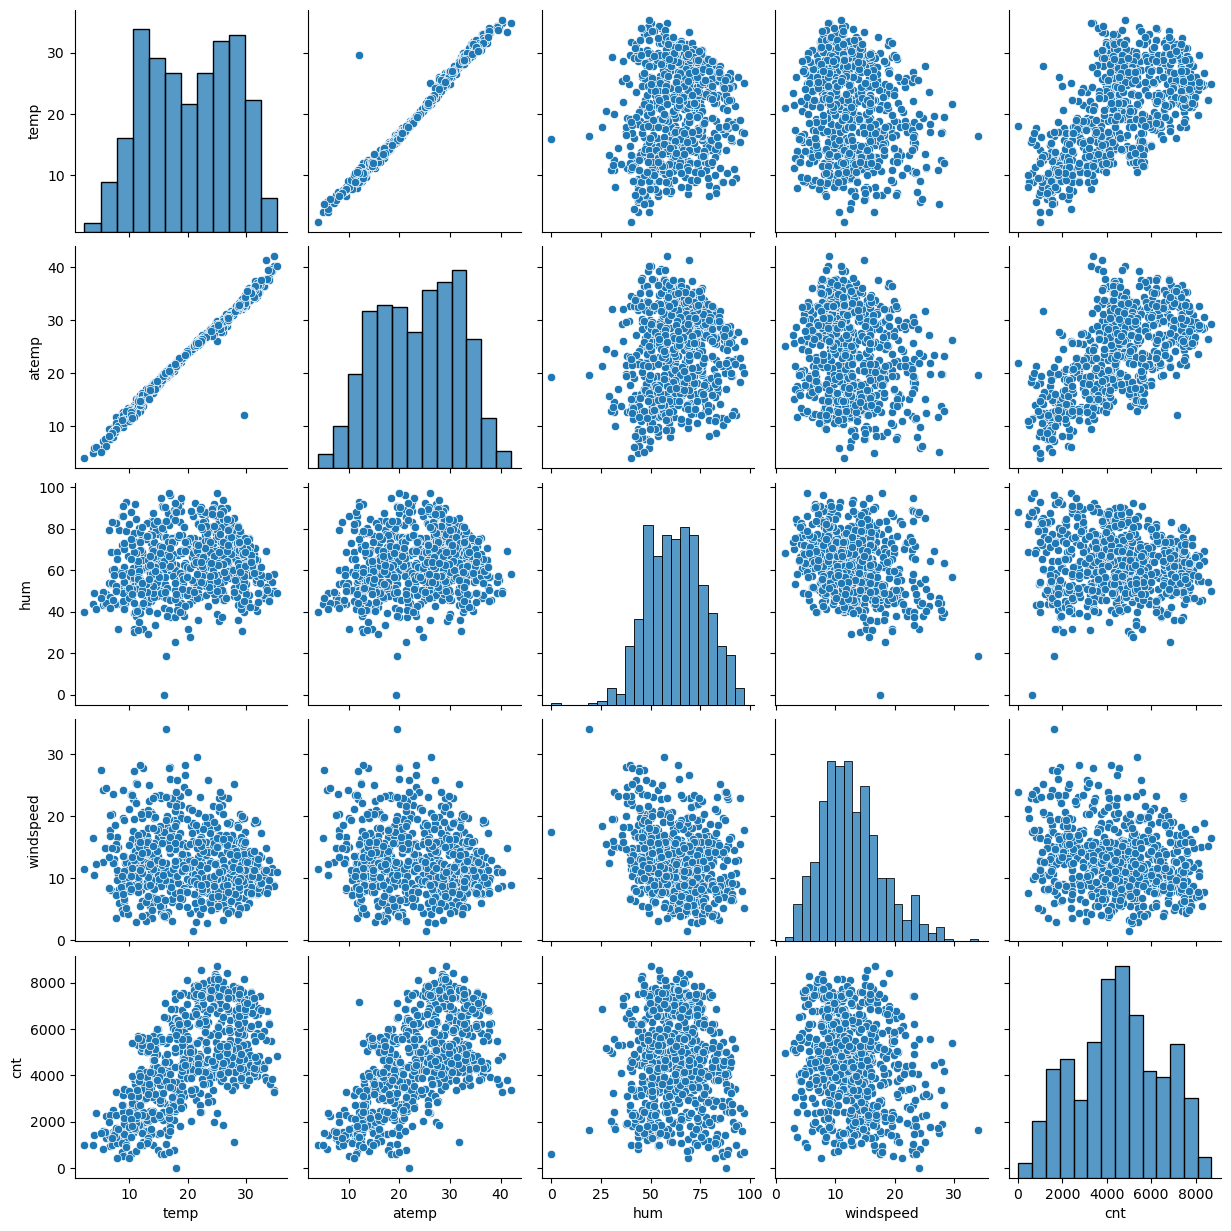

In [16]:
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed','cnt']])
plt.show()

In [ ]:
# 'temp' and 'atemp' has correlation with 'cnt'

In [ ]:
# Visualising Categorical variables

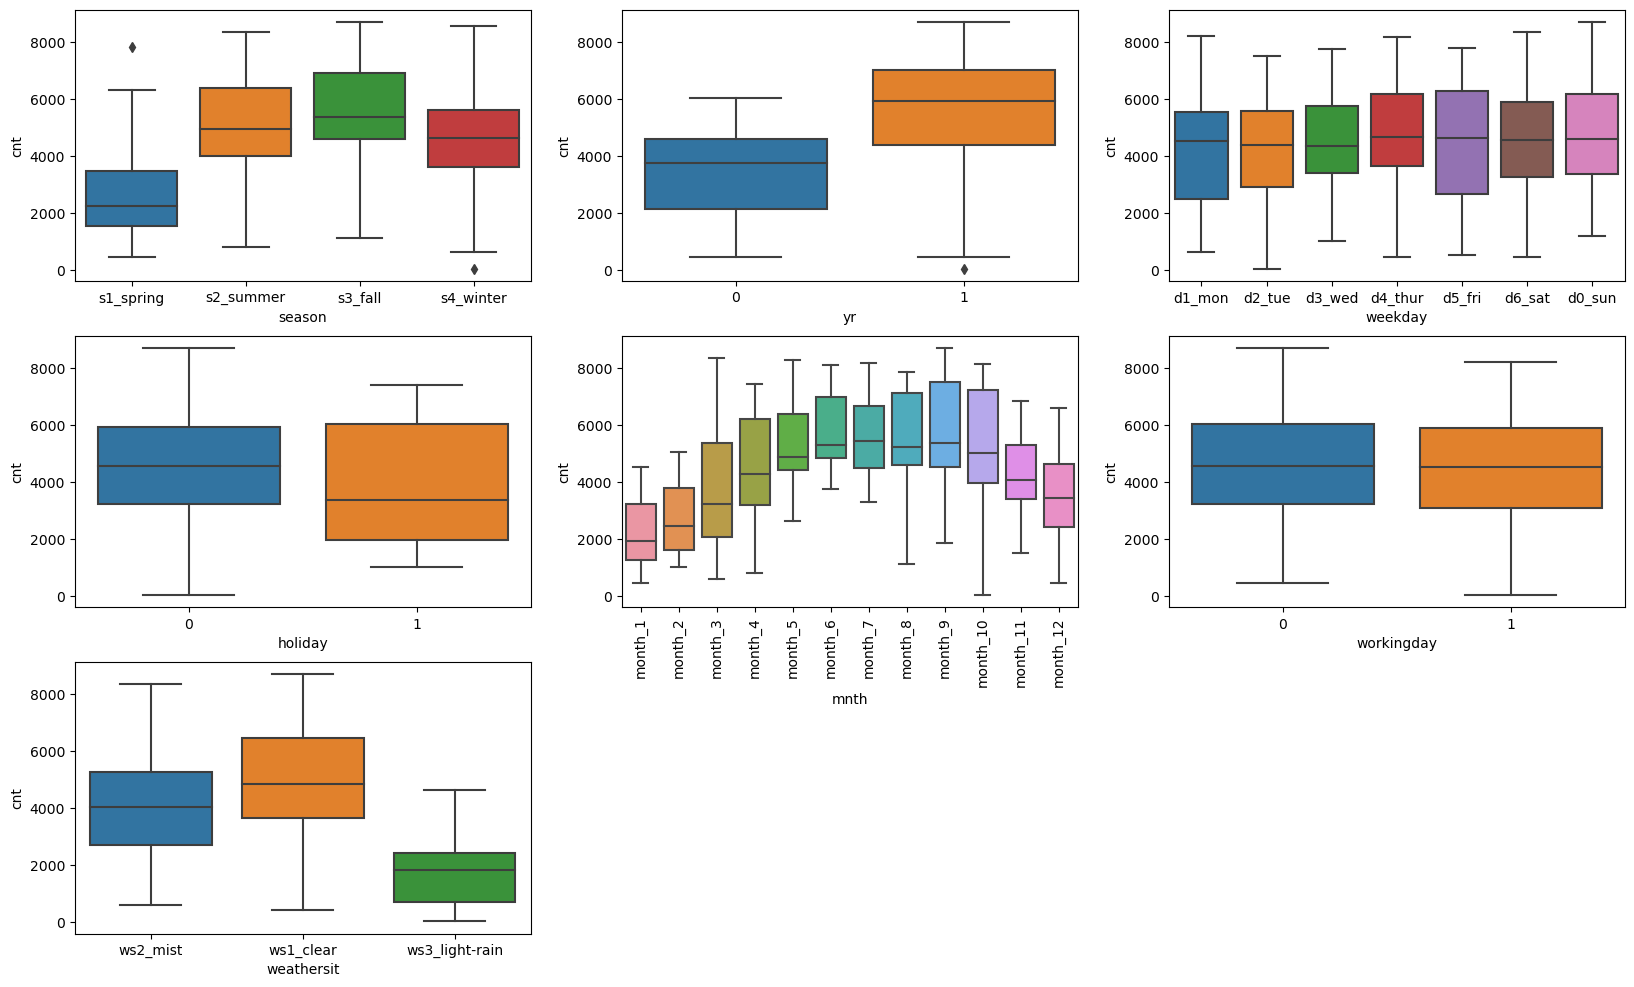

In [17]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data= df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data= df)          
plt.subplot(3,3,3)
sns.boxplot(x='weekday',y='cnt',data= df)          
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data= df)          
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt',data= df)
plt.xticks(rotation = 90)         
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data= df)          
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data= df)          
plt.show()                                                                           
           

In [ ]:
# fall season has more count of rental bikes and spring season has less count 
# Year 1(2019) has more count of rental bikes in comparison to year 0(2018)
# No holiday has more count of rental bikes
# Month 9(sept) has more count of rental bikes in comparison to others
# count of rental bikes is more when weather situation is clear
# count of bikes is slightly more on non-working day than working day 

In [ ]:
# Multivariate Analysis

<Axes: >

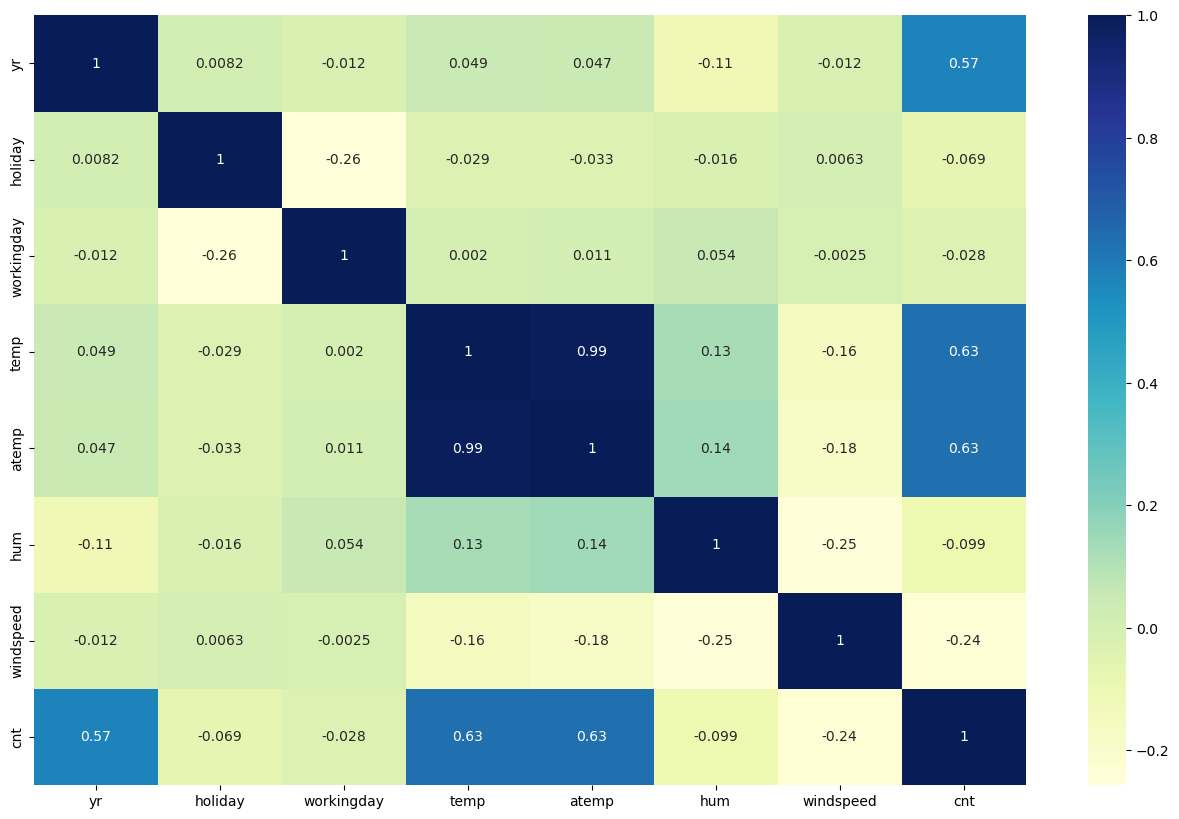

In [18]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

In [ ]:
# temp and atemp has high correlation of 0.99
# cnt has correlation of 0.63 with temp
# cnt has correlation of 0.63 with atemp

## Step 4: Data preparation

In [ ]:
# Get dummies for columns season, weekday, mnth, weathersit and also using 'drop_first = True'

In [19]:
d_season = pd.get_dummies(df.season,drop_first = True)
d_weekday = pd.get_dummies(df.weekday,drop_first = True)
d_mnth = pd.get_dummies(df.mnth,drop_first = True)
d_weathersit = pd.get_dummies(df.weathersit,drop_first = True)

In [ ]:
# Adding all the dummies column (d_weekday,d_mnth,d_season,d_weathersit) to orignal dataframe(df)

In [20]:
df = pd.concat([df,d_weekday,d_mnth,d_season,d_weathersit], axis=1)

In [21]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,d1_mon,d2_tue,d3_wed,d4_thur,d5_fri,d6_sat,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,s2_summer,s3_fall,s4_winter,ws2_mist,ws3_light-rain
0,s1_spring,0,month_1,0,d1_mon,1,ws2_mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,s1_spring,0,month_1,0,d2_tue,1,ws2_mist,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,s1_spring,0,month_1,0,d3_wed,1,ws1_clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,s1_spring,0,month_1,0,d4_thur,1,ws1_clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,s1_spring,0,month_1,0,d5_fri,1,ws1_clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dropping season, mnth, weekday, weathersit columns as dummies are created for them 

In [22]:
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)

In [23]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,d1_mon,d2_tue,d3_wed,d4_thur,d5_fri,d6_sat,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,s2_summer,s3_fall,s4_winter,ws2_mist,ws3_light-rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df.shape

(730, 30)

In [25]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'd1_mon', 'd2_tue', 'd3_wed', 'd4_thur', 'd5_fri', 'd6_sat',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 's2_summer',
       's3_fall', 's4_winter', 'ws2_mist', 'ws3_light-rain'],
      dtype='object')

## Step 5 : Splitting the data into Training and Testing sets

In [ ]:
# Import train_test_split

In [26]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features

In [ ]:
# Min-Max Scaling

In [ ]:
# import MinMaxScaler

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler to all numerical variable

In [29]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,d1_mon,d2_tue,d3_wed,d4_thur,d5_fri,d6_sat,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,s2_summer,s3_fall,s4_winter,ws2_mist,ws3_light-rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [31]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,d1_mon,d2_tue,d3_wed,d4_thur,d5_fri,d6_sat,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,s2_summer,s3_fall,s4_winter,ws2_mist,ws3_light-rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.086275,0.086275,0.084314,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.245098,0.262745,0.24902,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.281045,0.281045,0.278131,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.430568,0.440557,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

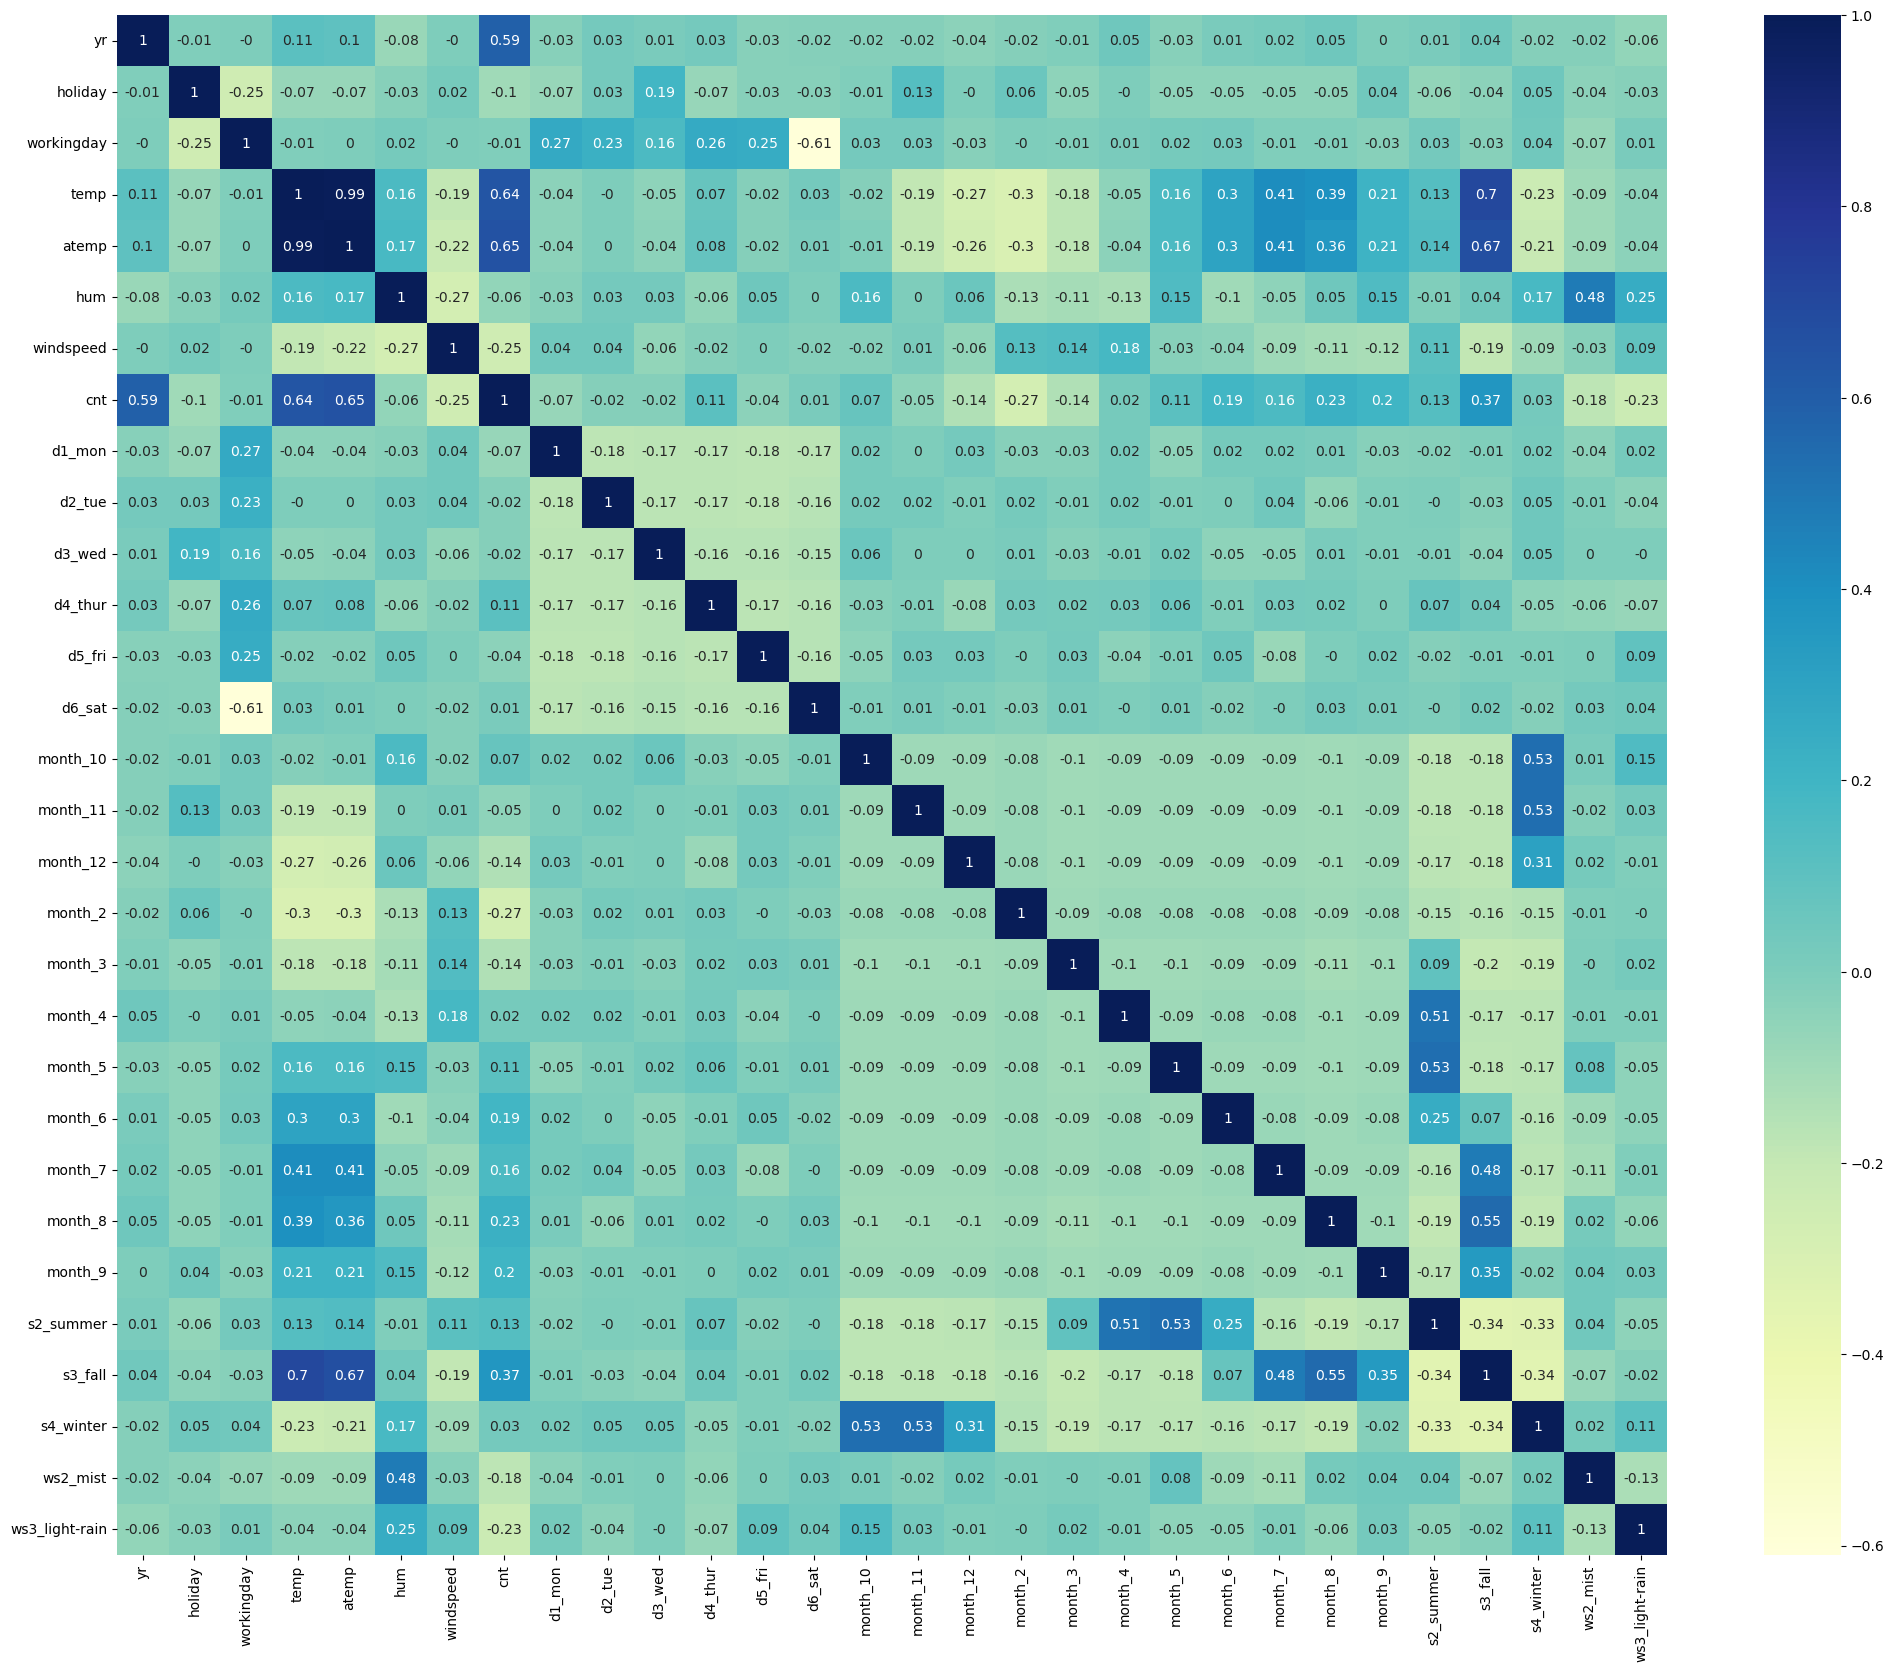

In [32]:
# Checking correlation coefficient to see which variables are highly correlated

plt.figure(figsize = (25,20))
sns.heatmap(round(df_train.corr(),2), annot = True, cmap = 'YlGnBu')

In [ ]:
# temp and atemp are highly correlated

In [ ]:
# Dividing into X and Y sets for model building

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 6 : Building a linear model

In [ ]:
# First using RFE(REcursive Feature Elimination) 

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)            # Running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('d1_mon', False, 9),
 ('d2_tue', False, 10),
 ('d3_wed', False, 8),
 ('d4_thur', False, 6),
 ('d5_fri', False, 7),
 ('d6_sat', False, 15),
 ('month_10', True, 1),
 ('month_11', False, 13),
 ('month_12', False, 14),
 ('month_2', False, 11),
 ('month_3', True, 1),
 ('month_4', False, 2),
 ('month_5', True, 1),
 ('month_6', False, 3),
 ('month_7', False, 12),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('s2_summer', True, 1),
 ('s3_fall', True, 1),
 ('s4_winter', True, 1),
 ('ws2_mist', True, 1),
 ('ws3_light-rain', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'month_10', 'month_3',
       'month_5', 'month_8', 'month_9', 's2_summer', 's3_fall', 's4_winter',
       'ws2_mist', 'ws3_light-rain'],
      dtype='object')

In [ ]:
# Building Model using statsmodel,for detailed statistics

In [ ]:
# Creating dataframe with RFE selected variables

In [38]:
X_train_rfe = X_train[col]

In [39]:
# Adding a constant variable
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_rfe)

In [40]:
# Running the linear model

lr_1 = sm.OLS(y_train,X_train_lm).fit() 

In [41]:
# Summary of linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.95e-189
Time:                        17:46:49   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2376      0.027      8.

In [42]:
# Checking VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Creating a dataframe that will the names of all the feature variables and their respective VIFs

In [43]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,24.64
3,hum,15.55
11,s3_fall,8.80
4,windspeed,3.80
10,s2_summer,3.73
12,s4_winter,3.13
13,ws2_mist,2.15
0,yr,2.04
8,month_8,1.85
7,month_5,1.68


In [ ]:
# variables with p-value greater than 0.05 are insignificant

In [ ]:
# 'month_5' has high p value, is insignificant in presence of other variable and can be dropped

In [44]:
X_train_new = X_train_rfe.drop(['month_5'],axis=1)

In [ ]:
# Rebuilding Model without 'month_5'

In [45]:
# Adding a constant variable

X_train_lm = sm.add_constant(X_train_new)

In [46]:
# Running the linear model
lr_2 = sm.OLS(y_train,X_train_lm).fit() 

In [47]:
# Summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          9.02e-190
Time:                        17:47:13   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2321      0.027      8.

In [ ]:
# Checking VIF (Variance Inflation Factor)

In [48]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,24.01
3,hum,15.51
10,s3_fall,8.53
4,windspeed,3.73
9,s2_summer,3.51
11,s4_winter,3.07
12,ws2_mist,2.15
0,yr,2.03
7,month_8,1.85
5,month_10,1.64


In [ ]:
# 's3_fall' has high p-value, is insignificant in presence of other variable and can be dropped

In [49]:
X_train_new = X_train_new.drop(['s3_fall'],axis=1)

In [ ]:
# Rebuilding the model without 's3_fall' 

In [50]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [51]:
# Running the linear model
lr_3 = sm.OLS(y_train,X_train_lm).fit() 

In [52]:
# Summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.26e-190
Time:                        17:47:28   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2324      0.027      8.

In [ ]:
# Checking VIF (Variance Inflation Factor)

In [53]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,hum,14.75
2,temp,10.01
4,windspeed,3.69
10,s4_winter,2.34
11,ws2_mist,2.14
0,yr,2.02
9,s2_summer,1.83
5,month_10,1.61
7,month_8,1.61
8,month_9,1.34


In [ ]:
# 'month_3' has high p-value, is insignificant and can be dropped

In [54]:
X_train_new = X_train_new.drop(['month_3'],axis=1)

In [ ]:
# Rebuilding the model without 'month_3' 

In [55]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [56]:
# Running the linear model
lr_4 = sm.OLS(y_train,X_train_lm).fit() 

In [57]:
# Summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          6.02e-191
Time:                        17:47:47   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2390      0.027      8.

In [ ]:
# Checking VIF (Variance Inflation Factor)

In [58]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
9,s4_winter,2.27
10,ws2_mist,2.13
0,yr,2.02
8,s2_summer,1.83
5,month_10,1.61
6,month_8,1.60
7,month_9,1.34


In [ ]:
# Humidity 'hum' have high VIF and can be dropped

In [59]:
X_train_new = X_train_new.drop(['hum'],axis=1)

In [ ]:
# Rebuilding the model without 'hum' 

In [60]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [61]:
# Running the linear model
lr_5 = sm.OLS(y_train,X_train_lm).fit() 

In [62]:
# Summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          3.21e-187
Time:                        17:48:02   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1355      0.017      8.

In [ ]:
# Checking VIF (Variance Inflation Factor)

In [63]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
8,s4_winter,1.95
7,s2_summer,1.82
4,month_10,1.60
5,month_8,1.59
9,ws2_mist,1.49
6,month_9,1.34
10,ws3_light-rain,1.09


In [ ]:
# 'month_10' has high p-value, is insignificant and can be dropped

In [64]:
X_train_new = X_train_new.drop(['month_10'],axis=1)

In [ ]:
# Rebuilding the model without 'month_10' 

In [65]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [66]:
# Running the linear model
lr_6 = sm.OLS(y_train,X_train_lm).fit() 

In [67]:
# Summary
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.26e-187
Time:                        17:48:25   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1312      0.017      7.

In [ ]:
# Checking VIF (Variance Inflation Factor)

In [68]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
6,s2_summer,1.81
4,month_8,1.58
7,s4_winter,1.49
8,ws2_mist,1.48
5,month_9,1.31
9,ws3_light-rain,1.08
1,holiday,1.04


In [ ]:
# As the p-values and VIFs both are in acceptable range. So we can go ahead and make our predictions using this model only.

In [ ]:
# lr_6 is our final model.

In [ ]:
# For train data
# Value of R-squared = 0.834
# Value of Adjusted R-squared = 0.831

## Step-7 : Residual Analysis of same data

In [ ]:
# To check if error terms are also normally distributed(one of the major assumptions of linear Regression).
# Plotting histogram of error terms

In [69]:
y_train_cnt = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

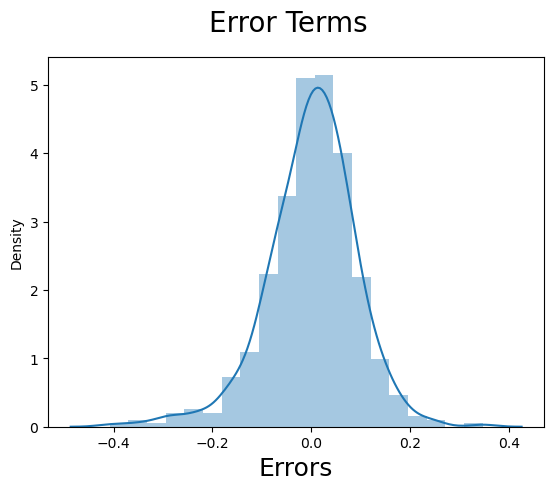

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [ ]:
# Error terms are normally distibuted

## Step-8 : Making Predictions using the final model

In [ ]:
# Applying Scaler on the test sets

In [71]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [72]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,d1_mon,d2_tue,d3_wed,d4_thur,d5_fri,d6_sat,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,s2_summer,s3_fall,s4_winter,ws2_mist,ws3_light-rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.082192,0.073059,0.086758,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.264840,0.246575,0.232877,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.275286,0.260830,0.282125,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.442259,0.432005,0.423633,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Dividing into X_test and y_test

In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
# Now using our model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [75]:
# Making predictions
y_pred = lr_6.predict(X_test_new)

## Step-9 : Model Evaluation

Text(0, 0.5, 'y_pred')

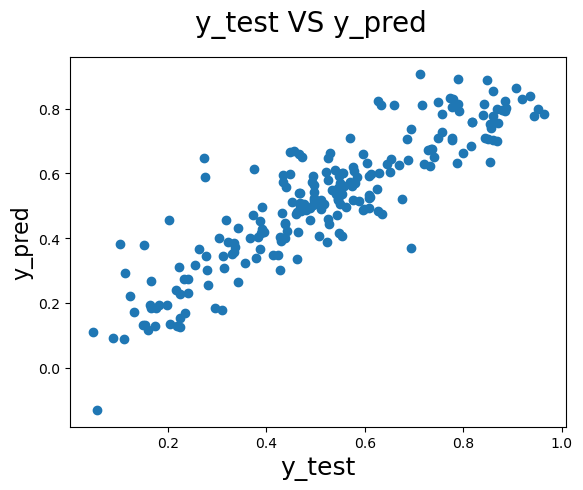

In [76]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test VS y_pred' , fontsize =20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)

In [ ]:
# y_test allign well with the y_pred

In [77]:
from sklearn.metrics import r2_score

# Calculating R-squared
r_sq = r2_score(y_test, y_pred)
r_sq = round(r_sq,4)
# Calculating Adjusted R-squared
n = len(y_test)           # Number of samples
p = 10                    # Number of predictor variables

adj_r_sq = round(1 - ((1-r_sq)*(n-1)/(n-p-1)),4)

print("Value of R-sqared: ", r_sq)
print("Value of Adjusted R-sqared: ",adj_r_sq)

Value of R-sqared:  0.7931
Value of Adjusted R-sqared:  0.7832


In [ ]:
# For Test data
# Value of R-squared = 0.7931
# Value of adjusted R-squared = 0.7832

In [ ]:
# Equation of best fitted line is :

# cnt = 0.1312 + 0.2325 X yr - 0.0971 X holiday + 0.5174 X temp - 0.1497 X windspeed + 0.0542 X month_8 + 0.1162 X month_9 
#              + 0.1000 X s2_summer + 0.1383 X s4_winter - 0.0825 X ws2_mist - 0.2828 X ws3_light-rain 

In [ ]:
# Obsevations:

In [ ]:
# Features having positive coefficient are yr, temp, month_8(Aug), month_9(sept), s2_summer, s4_winter

In [ ]:
# Features having negative coefficient are holiday, windspeed, ws2_mist, ws3_light-rain 

In [ ]:
# Recommendations:

In [ ]:
# 1) Demand of total rental bikes would be more when there is high temperature.
#    So,temp variable is a good indicator of demand and important in generating reveue.
# 2) Demand of total rental bikes would be more in month of september and august.
#    So,more revenue can be generated in these months.
# 3) In the season of summer and winter demand of rental bikes would be much more.
#    So, these season are good indicator.
# 4) Demand of rental bikes has increased over the year of 2018 to 2019.
# 5) On holidays demand of rental bikes would be less.
#    Less revenue would be generated on holidays.
# 6) With increase in windspeed count of rental bikes would be less.
#    More windspeed can be considered as unfavorable condition.
# 7) In weather situations like light-rain and mist demand of bikes would be much less.
#    In these weather situations less revenue would be generated. 